In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import cv2
import joblib as jb

# pd.set_option('display.max_rows', 5000)
# pd.set_option('display.max_columns', 5000)
# pd.set_option('display.width', 10000)
# warnings.filterwarnings('ignore')


# Read Datasets

In [2]:
df = pd.read_csv('D:\\Studying\\FCAI\\Level 3\\1st Semester\\AI - Artificial Intellegince\\Project\\emnist-balanced-train.csv' , header=None)
char_map = pd.read_csv('D:\\Studying\\FCAI\\Level 3\\1st Semester\\AI - Artificial Intellegince\\Project\\emnist-balanced-mapping.txt' , delimiter=' ', header=None , index_col=0 )

# df
char_map

,1
0,
0,48
1,49
2,50
3,51
4,52
5,53
6,54
7,55
8,56


# Get Labels

In [3]:
mapping = {}
for index, label in enumerate(char_map.iloc[:, 0]):
    mapping[index] = chr(label)

In [4]:
mapping

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

# Split Dataset

In [5]:
X_df = df.iloc[:,1:]
y_df = df.iloc[ : , 0 ]
print(X_df)

        1    2    3    4    5    6    7    8    9    10   ...  775  776  777  \
0         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
112795    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112796    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112797    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112798    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112799    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        778  779  780  781  782  783  7

# Rotate Images

features berfore reshape: (784,)

features after reshape: (28, 28)


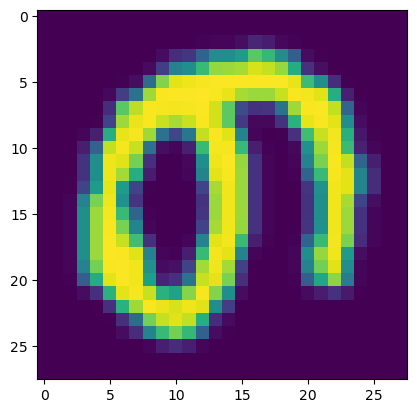

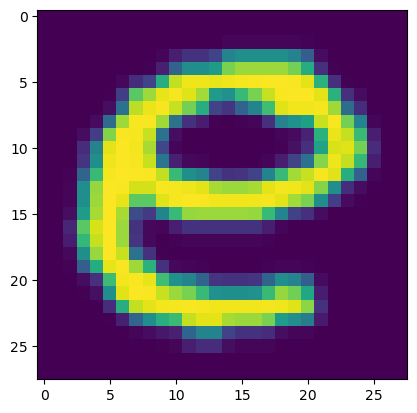

In [6]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

image = X_df.iloc[1258].values
print("features berfore reshape: "+str(image.shape)+"\n")
image = image.reshape((28, 28))
print("features after reshape: "+str(image.shape))
plt.imshow(image)
plt.show()

plt.imshow(rotate(image))
plt.show()

In [7]:
X_df = np.asarray(X_df)
X_df = np.apply_along_axis(rotate, 1, X_df)

# Images after rotate

Target is: F


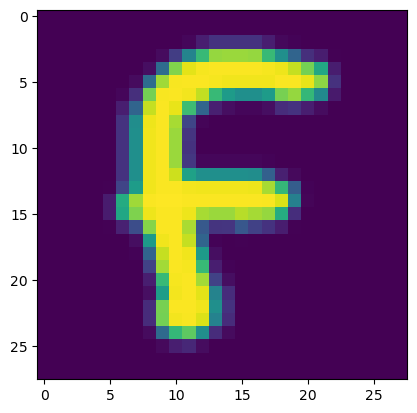

In [8]:
index = 3333

if y_df[index] in mapping:
    print("Target is:", mapping[y_df[index-1]])
else:
    print("Target is not found in the mapping dictionary.")

plt.imshow(X_df[index-1])

In [9]:
X_df.shape

(112800, 28, 28)

In [10]:
nsamples, nx, ny = X_df.shape
X_df = X_df.reshape(nsamples,nx*ny)
X_df.shape

(112800, 784)

# Split to Fit

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size= 0.15, random_state=22)

# Decision Tree

In [12]:
DT_model_e = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=35 , min_samples_split=2)
DT_model_g = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=35 , min_samples_split=2)

In [13]:
DT_model_e.fit(X_train , y_train)
DT_model_g.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=35, random_state=100)

In [14]:
y_pred_DT_e = DT_model_e.predict(X_test)
y_pred_DT_g = DT_model_g.predict(X_test)

### Accuracy

In [15]:
f1_score(y_pred_DT_e,y_test , average='weighted')
# f1_score(y_pred_DT_g,y_test , average='weighted')

0.6043208335205105

In [16]:
accuracy_score(y_pred_DT_e,y_test)
# accuracy_score(y_pred_DT_g,y_test)

0.6048463356973995

# Random Forest

In [17]:
RF_modelg = RandomForestClassifier(n_estimators=350 , criterion='gini', max_depth=30, min_samples_split=2 , min_samples_leaf=24, n_jobs= -1)
RF_modele = RandomForestClassifier(n_estimators=350 , criterion='entropy', max_depth=30, min_samples_split=2 , min_samples_leaf=24, n_jobs= -1)

In [18]:
RF_modelg.fit(X_train , y_train)
RF_modele.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=24,
                       n_estimators=350, n_jobs=-1)

In [19]:
y_pred_RFg = RF_modelg.predict(X_test)
y_pred_RFe = RF_modele.predict(X_test)

### Accuracy

In [20]:
# f1_score(y_pred_RFg,y_test , average='weighted')
f1_score(y_pred_RFe,y_test , average='weighted')

0.7652660092317061

In [22]:
# accuracy_score(y_pred_RFg,y_test)
accuracy_score(y_pred_RFe,y_test)

0.7611111111111111

# Visualize 

In [23]:
cf = confusion_matrix(y_test, y_pred_RFe)

In [25]:
pd.DataFrame(cf).style.background_gradient(cmap = "inferno")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,239,0,0,0,0,0,1,0,5,0,0,2,0,19,0,0,0,0,0,0,0,0,0,0,83,1,5,0,0,0,3,0,0,0,0,0,2,2,0,0,0,1,0,0,0,0,0
1,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,5,0,47,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,1,1,0,0,0,0,0,0,1,1
2,0,0,252,0,0,0,0,5,1,0,1,1,0,3,0,0,3,0,0,4,1,1,0,0,0,0,2,5,0,0,0,0,1,2,0,55,5,4,3,0,0,0,0,0,0,1,0
3,0,0,4,318,0,2,0,2,2,0,0,3,0,1,0,0,1,0,0,13,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,0,1,1,0,0,2,0,0,0,0,1
4,0,0,0,0,296,0,0,0,0,4,9,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,0,0,0,6,9,1,0,20,0,2,0,3,0,4,0,3,1,3,1,12
5,0,1,0,5,0,258,1,0,2,2,0,3,0,1,0,0,6,0,0,5,0,0,0,0,0,0,0,0,79,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5,0
6,0,1,0,0,0,0,309,0,1,0,0,0,5,0,2,0,14,0,0,0,0,3,0,0,0,0,0,0,0,0,4,1,3,0,0,0,0,40,1,0,0,0,1,0,0,2,1
7,0,1,0,0,1,0,0,336,0,6,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,1,0,0,0,6,0,0,0,0,2,0,0,0,0,0,1,0,0,3,0,0,7
8,1,3,0,3,0,1,0,0,269,3,0,32,0,3,3,0,1,0,0,0,1,0,0,0,0,6,2,2,0,0,0,2,0,0,1,0,0,0,2,0,3,0,0,0,12,4,2
9,0,0,0,1,4,0,0,7,0,330,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,6,1,0,0,0,0,0,0,4,0,2,0,0,0,0,8,0,0,28,0,1


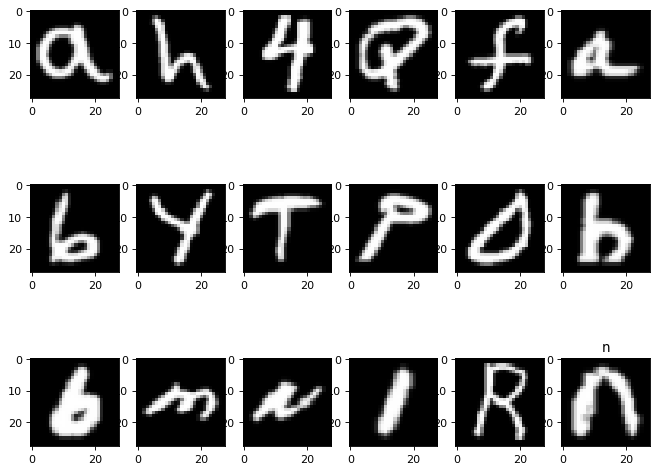

In [26]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
   plt.subplot(3,6,i-99)
   plt.imshow(X_test[i].reshape(28, 28) , cmap=plt.cm.gray)


if y_pred_RFe[i] in mapping:
   plt.title(mapping[y_pred_RFe[i]])
else:
   plt.title('Unknown')


# Test external sample


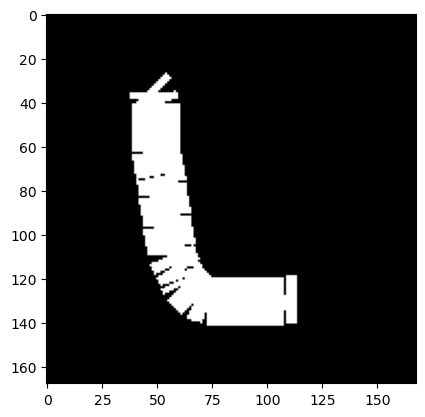

In [27]:
img = cv2.imread('C:\\Users\\DELL\\Downloads\\ai project\\image.png')
plt.imshow(img)

In [28]:
BW = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(BW , (28,28) , interpolation = cv2.INTER_AREA)
final_img = resized_img.reshape(-1)
y_pred_samp = RF_modele.predict([final_img])

In [29]:
   if y_pred_samp[0] in mapping:
     print("Predicted " + mapping[ ( y_pred_samp[0] ) ]  )
   else:
       print("Key not found in mapping")

Predicted L


In [31]:
X_test = np.asarray(X_test)
X_test = np.apply_along_axis(rotate, 1, X_test)


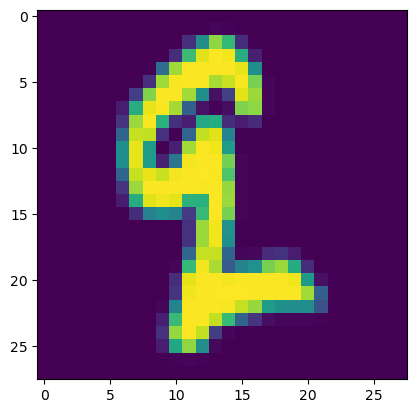

In [38]:
index = 5
plt.imshow(rotate(X_test[index]))

In [39]:
tst = RF_modele.predict(rotate(X_test[index]).reshape(1,-1))

In [41]:
   if tst[0] in mapping:
     print("Predicted " + mapping[ ( tst[0] ) ]  )
   else:
       print("Key not found in mapping")

Predicted q


# Saving The Model

In [42]:
jb.dump(RF_modele , 'C:\\Users\\DELL\\Downloads\\ai project\\final_ai.sav')

['C:\\Users\\DELL\\Downloads\\ai project\\final_ai.sav']

In [214]:
last = jb.load('C:\\Users\\mohamed\\Downloads\\project\\RF_Model\\final_ai_RF_modele.sav')

# Test the saved Model

Predicted L


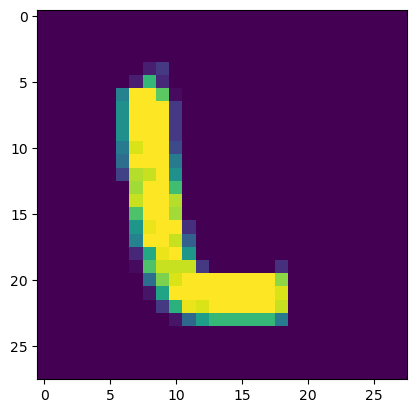

In [256]:
predicted_key = last.predict([final_img])[0]
if predicted_key in mapping:
 print("Predicted " + mapping[predicted_key])
else:
 print("Key not found in mapping")

im = final_img
im = rotate(im)
im = rotate(im)
plt.imshow(im)
